In [1]:
%cd C:\Users\yukir\Documents\GitHub\Scrapper\py

from nlp_processing import *
set_global_determinism(seed=1337)

%cd C:\Users\yukir\Documents\Monicas_workspace\Korea_medicine

C:\Users\yukir\Documents\GitHub\Scrapper\py
True
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6590909899069797822
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 17030038091596798226
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9883535296
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16305358836873346770
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 11776730964713711191
physical_device_desc: "device: XLA_GPU device"
]
tf 2.2.0
set_global_determinism(seed=1337) 이거 꼭 해라
set_global_determinism(seed=1337) 이거 꼭 해라
set_global_determinism(seed=1337) 이거 꼭 해라
C:\Users\yukir\Documents\Monicas_workspace\Korea_medicine


In [2]:
final_review = pd.read_csv("C:\\Users\\yukir\\Documents\\Monicas_workspace\\Korea_medicine\\final_reviews.csv", index_col = 0)
final_review.head(2)

,hospital,stars,reviews,adress
0,청주나비솔한의원,10.0,병원이 전반적으로 깔끔해서 쾌적했어요대기가 좀 있지만 심하진 않은편이었고 간호사분들...,충북
1,청주나비솔한의원,7.5,체인 한의원이라서 망설였는데 시설도 깔끔하고 진료도 친절하게 너무 잘 봐주셨어요 그...,충북


In [3]:
%cd /content/drive/MyDrive/Projects/korean_medicine
from nlp_processing import *
set_global_determinism(seed=1337)

/content/drive/MyDrive/Projects/korean_medicine
True
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12947112768161484523
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11345264640
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1003586174315095079
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]
tf 2.6.0
set_global_determinism(seed=1337) 이거 꼭 해라
set_global_determinism(seed=1337) 이거 꼭 해라
set_global_determinism(seed=1337) 이거 꼭 해라


In [3]:
df = final_review.copy()
print(df.shape)

(14989, 4)


In [4]:
df = df.dropna(axis=0)
print(df.shape)

(14988, 4)


{'whiskers': [<matplotlib.lines.Line2D at 0x1da6492a4c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1da6492ab20>,
 'boxes': [<matplotlib.lines.Line2D at 0x1da6492a070>],
 'medians': [<matplotlib.lines.Line2D at 0x1da64937280>],
 'fliers': [<matplotlib.lines.Line2D at 0x1da64937610>],
 'means': []}

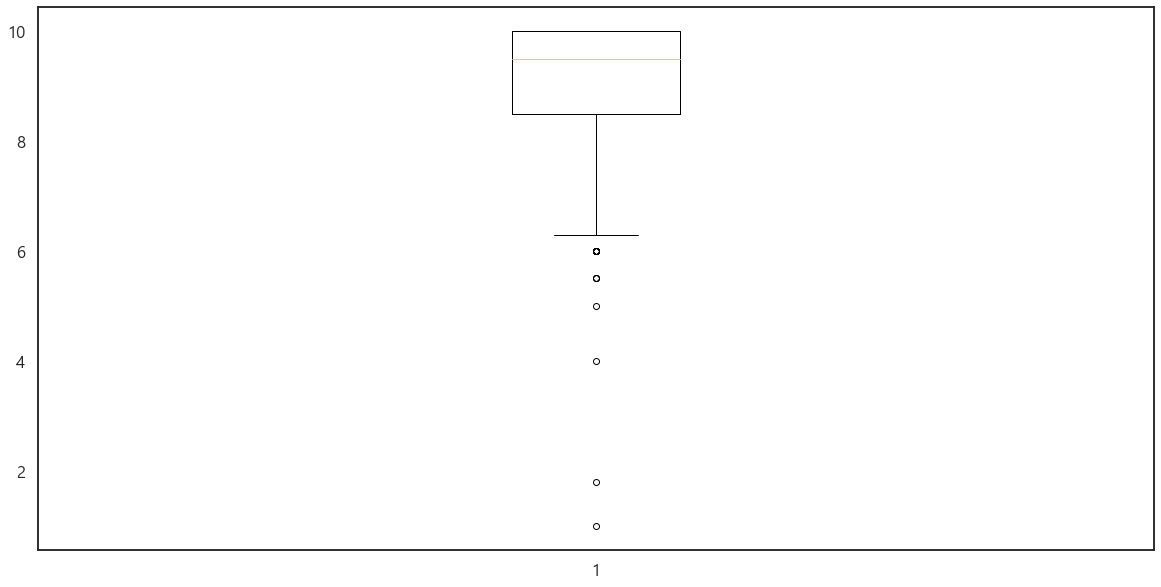

In [5]:
region= df[df['adress'] == '대구']
plt.boxplot(region.stars)

In [6]:
df_more6 = region[region['stars'] <=6.2]
print(df_more6.shape)
df_more6.head()

(15, 4)


,hospital,stars,reviews,adress
22,대구자생한방병원,5.5,내 돈 내고는 못갈곳교통사고로 치료 받으러 갔는데 대기 30분하고 침 10분은 아닌...,대구
36,청담미한의원,1.8,직원들은 자기네들끼리 떠들기 바쁘고 여자원장님도 뭔가 전문적인 느낌이 없었어요한약이...,대구
99,봉화한의원,1.0,스트레스받아서 더아팠다여자한의사분업무상 목이 너무너무아파서 갔는데 스트레스성도 있다...,대구
179,금호한의원,5.5,원장님은 친절하세요그런데 카운터 여직원 아주 불친절해요진료 잘받고 기분 나쁜 병원이에요ㅜ,대구
185,예맥한의원,4.0,동네에서 소개 받고 처음 방문한건데물리치료도 안했고 침맞고 부항을 했는데그 다음날 ...,대구


In [7]:
from konlpy.tag import Okt
okt = Okt()

In [8]:
def make_noun(x):
    x = okt.nouns(x)
    return x

In [9]:
df_more6['reviews'] = df_more6['reviews'].apply(make_noun)
for_network = df_more6.copy()
df_more6['reviews'].head()

C:\Users\yukir\AppData\Local\Temp/ipykernel_14388/3817455113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_more6['reviews'] = df_more6['reviews'].apply(make_noun)


22     [내, 돈, 곳, 교통사고, 치료, 대기, 침, 애, 그냥, 집, 근처, 거, 애,...
36     [직원, 자기, 끼리, 여자, 원장, 뭔가, 전문, 느낌, 한약, 한약, 효과, 주...
99     [스트레스, 더, 여자, 한의사, 업무, 목, 무아, 파서, 스트레스, 성도, 한약...
179                       [원장, 카운터, 여직원, 아주, 진료, 기분, 병원]
185    [동네, 소개, 처음, 방문, 물리치료, 침, 부항, 다음, 날, 오히려, 더, 파...
Name: reviews, dtype: object

In [10]:
# 여기서부터 조심해서 네트워크 해보기
df_more6['reviews']  = [" ".join(review) for review in df_more6['reviews'].values]
df_more6['reviews'].head() 

C:\Users\yukir\AppData\Local\Temp/ipykernel_14388/853035387.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_more6['reviews']  = [" ".join(review) for review in df_more6['reviews'].values]


22     내 돈 곳 교통사고 치료 대기 침 애 그냥 집 근처 거 애 치료 효과 접수 직원 외...
36     직원 자기 끼리 여자 원장 뭔가 전문 느낌 한약 한약 효과 주사 권유 장사 분 느낌...
99     스트레스 더 여자 한의사 업무 목 무아 파서 스트레스 성도 한약 정도 권유 왜 설명...
179                               원장 카운터 여직원 아주 진료 기분 병원
185    동네 소개 처음 방문 물리치료 침 부항 다음 날 오히려 더 파서 그냥 원래 한의원 ...
Name: reviews, dtype: object

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer = 'word', # 캐릭터 단위로 벡터화 할 수도 있습니다.
                             tokenizer = None, # 토크나이저를 따로 지정해 줄 수도 있습니다.
                             preprocessor = None, # 전처리 도구
                             stop_words = None, # 불용어 nltk등의 도구를 사용할 수도 있습니다.
                             min_df = 2, # 토큰이 나타날 최소 문서 개수로 오타나 자주 나오지 않는 특수한 전문용어 제거에 좋습니다. 
                             ngram_range=(1, 6), # BOW의 단위 갯수의 범위를 지정합니다.
                             max_features = 1000 # 만들 피처의 수, 단어의 수
                            )
vectorizer

TfidfVectorizer(max_features=1000, min_df=2, ngram_range=(1, 6))

In [12]:
# df['covid'] 만 벡터화 합니다.
feature_vector = vectorizer.fit_transform(df_more6['reviews'])
feature_vector.shape

(15, 40)

In [13]:
vocab = vectorizer.get_feature_names()
print(len(vocab))
vocab[:10]

40


['간호사', '권유', '그냥', '근처', '기분', '느낌', '동안', '때문', '말씀', '물리치료']

In [14]:
pd.DataFrame(feature_vector[:].toarray(), columns=vocab).head()

,간호사,권유,그냥,근처,기분,느낌,동안,때문,말씀,물리치료,방문,방문 물리치료,별로,부분,비용,상담,선생님,시간,안마,여자,원장,의사,의사 선생님,일반,정도,조금,직원,진료,처음,치료,치료 치료,통증,파서,한번,한약,한의원,허리,환자,회사,효과
0,0.307984,0.000000,0.235758,0.345114,0.000000,0.000000,0.0,0.345114,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.307984,0.0,0.000000,0.000000,0.307984,0.0,0.0,0.000000,0.0,0.255653,0.000000,0.000000,0.511307,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.307984
1,0.000000,0.267801,0.182943,0.000000,0.000000,0.716968,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.267801,0.198382,0.000000,0.0,0.0,0.000000,0.0,0.198382,0.198382,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.365887,0.000000,0.0,0.000000,0.0,0.238989
2,0.000000,0.222057,0.000000,0.000000,0.222057,0.396334,0.0,0.000000,0.0,0.198167,0.179636,0.222057,0.0,0.0,0.0,0.0,0.0,0.198167,0.0,0.222057,0.000000,0.000000,0.0,0.0,0.444114,0.0,0.328991,0.000000,0.000000,0.000000,0.0,0.0,0.222057,0.0,0.151694,0.000000,0.0,0.396334,0.0,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.690475,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.511490,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.511490,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000
4,0.000000,0.000000,0.296219,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.386968,0.350782,0.433619,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.433619,0.000000,0.0,0.0,0.433619,0.0,0.000000,0.274565,0.0,0.000000,0.0,0.000000


In [15]:
# 위에서 구한 단어벡터를 더하면 단어가 전체에서 등장하는 횟수를 알 수 있습니다.
# 벡터화 된 피처를 확인해 봄
# Bag of words 에 몇 개의 단어가 들어있는지 확인
# 
dist = np.sum(feature_vector, axis=0)
    
df_freq = pd.DataFrame(dist, columns=vocab)
print(df_freq.shape)
df_freq.to_excel('df_freq.xlsx', encoding= 'utf-8')

(1, 40)


In [16]:
# 행과 열의 축을 T로 바꿔주고 빈도수로 정렬합니다.
df_freq.T.sort_values(by=0, ascending=False).head(100)

,0
치료,2.490513
한의원,1.873753
진료,1.633905
그냥,1.549209
원장,1.527662
한약,1.514786
느낌,1.325600
상담,1.212495
직원,1.156280
효과,1.140196


In [17]:
# ["course", "freq"] 라는 컬럼명을 주어 위에서 만든 데이터프레임을 변환합니다.
df_freq_T = df_freq.T.reset_index()
df_freq_T.columns = ["words", "freq"]
df_freq_T.tail()
# df_freq_T.to_excel('df_freq_T.xlsx', encoding= 'utf-8')

,words,freq
35,한의원,1.873753
36,허리,0.504708
37,환자,1.123618
38,회사,0.775515
39,효과,1.140196


In [18]:
# 3개의 ngram과 빈도수로 역순 정렬을 하게 되면 빈도수가 높고, ngram수가 많은 순으로 정렬이 됨 
# 여기에서 drop_duplicates로 중복을 삭제 합니다.
print(df_freq_T.shape)
df_use = df_freq_T.drop_duplicates()
print(df_use.shape)

(40, 2)
(40, 2)


In [19]:
# 빈도수로 정렬을 하고 어떤 강좌가 댓글에서 가장 많이 언급되었는지 봅니다.
df_use = df_use.sort_values(by="freq", ascending=False)
df_use.head(20)

,words,freq
29,치료,2.490513
35,한의원,1.873753
27,진료,1.633905
2,그냥,1.549209
20,원장,1.527662
34,한약,1.514786
5,느낌,1.325600
15,상담,1.212495
26,직원,1.156280
39,효과,1.140196


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
C:\Users\yukir\anaconda3\envs\NLP\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yukir\anaconda3\envs\NLP\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47308 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yukir\anaconda3\envs\NLP\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yukir\anaconda3\envs\NLP\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yukir\anaconda3\envs\NLP\lib\site-packages\matplotlib\backends\backend_agg.py:240: Runtim

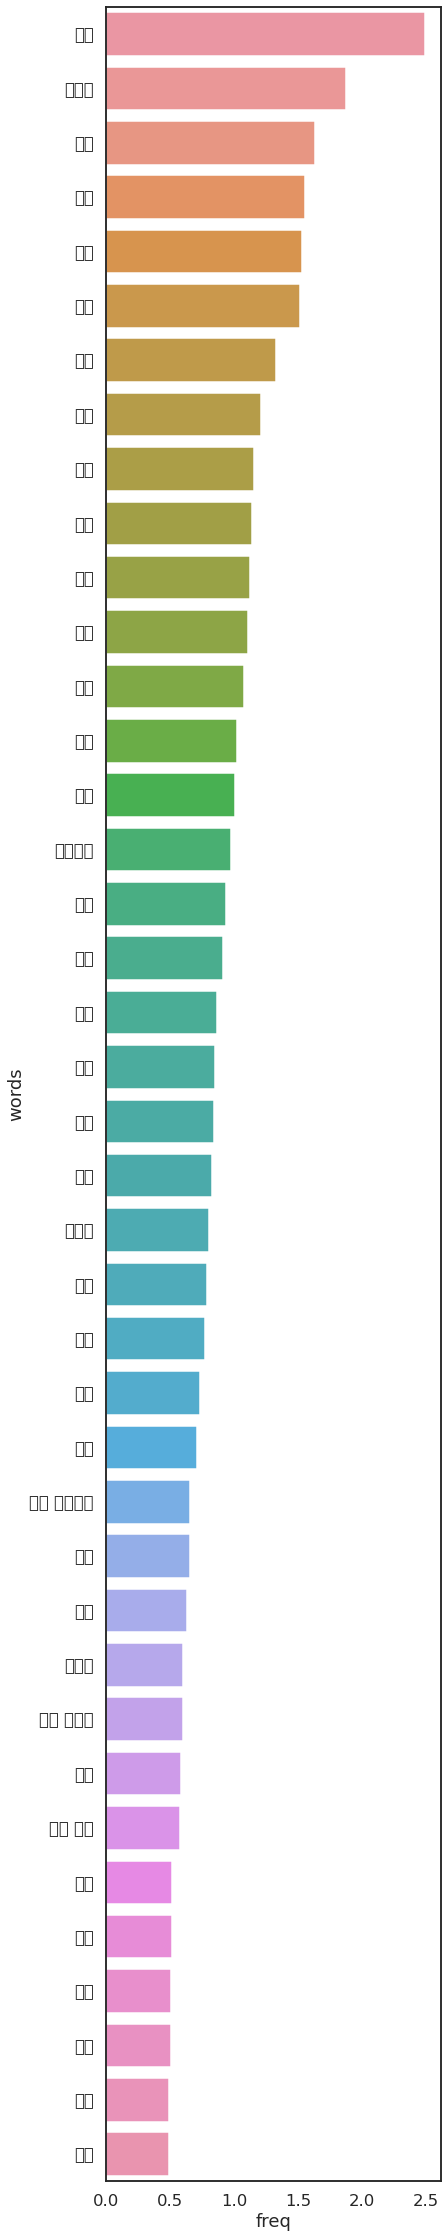

In [20]:
import seaborn as sns
plt.rc('font', family='NanumBarunGothic') 

plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(6,40))
ax = sns.barplot(x = 'freq', y = 'words', 
                 data = df_use.sort_values(by = 'freq', 
                                               ascending = False).head(100))
# ax.set(xlabel = 'Overall', ylabel = 'Pokemon')
# plt.savefig('covid2_frequency.png')
plt.show()


In [21]:
words_v2 = []

for num, i in enumerate (df_use.words):
  words_v2.append((i, int(df_use.freq[num])))

words_clean = words_v2.copy()

In [22]:
words_clean

[('치료', 0),
 ('한의원', 0),
 ('진료', 1),
 ('그냥', 0),
 ('원장', 0),
 ('한약', 1),
 ('느낌', 0),
 ('상담', 0),
 ('직원', 0),
 ('효과', 0),
 ('환자', 1),
 ('정도', 0),
 ('시간', 0),
 ('통증', 0),
 ('방문', 0),
 ('물리치료', 1),
 ('부분', 0),
 ('기분', 1),
 ('비용', 0),
 ('의사', 0),
 ('안마', 1),
 ('말씀', 0),
 ('간호사', 0),
 ('근처', 0),
 ('회사', 1),
 ('때문', 0),
 ('동안', 1),
 ('방문 물리치료', 1),
 ('파서', 0),
 ('처음', 2),
 ('의사 선생님', 0),
 ('선생님', 1),
 ('일반', 0),
 ('치료 치료', 0),
 ('별로', 1),
 ('조금', 1),
 ('허리', 0),
 ('한번', 1),
 ('권유', 0),
 ('여자', 1)]

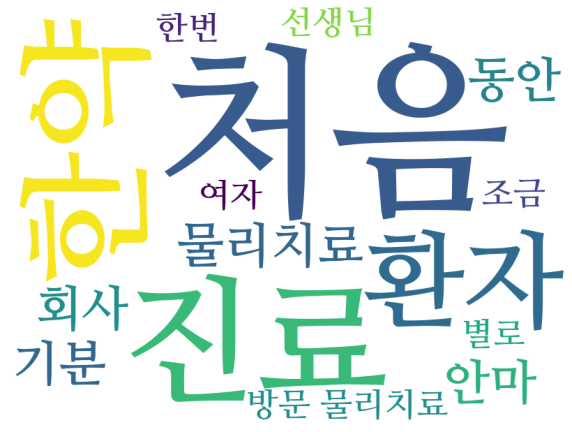

In [24]:
#불용어
from wordcloud import STOPWORDS
from wordcloud import WordCloud


mystopwords = set(STOPWORDS)
mystopwords.add('치료')
mystopwords.update(['설명의사','한의원'])


#워드클라우드. #폰트 경로설정 가장 중요


wordcloud = WordCloud(font_path="C:\\Users\\yukir\\Documents\\Monicas_workspace\\Korea_medicine\\NanumMyeongjoBold.ttf",
                      stopwords = mystopwords,
                      background_color='white',
                      width=800,
                      height=600)

# print(dict(words_v2))

cloud = wordcloud.generate_from_frequencies(dict(words_clean))
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

## **FOR**

In [ ]:
j = 0

del_list = []

for num, i in enumerate(words_clean):
    if '가격' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))
print(j)
print(len(del_list))       

53 ('가격', 5)
598 ('다만 가격', 4)
639 ('가격 한의원', 82)
922 ('진료 가격', 4)
95
4


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '불친절' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

0
4


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '의사' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

9 ('의사', 209)
15 ('의사 선생님', 131)
58 ('한의사', 30)
81 ('방문 의사', 32)
145 ('한의사 선생님', 101)
251 ('의사 선생님 설명', 126)
367 ('의사 선생님 진료', 615)
368 ('방문 의사 선생님', 32)
420 ('의사 선생님 간호사', 90)
465 ('직원 의사', 26)
509 ('진료 의사', 464)
527 ('한의원 의사', 26)
572 ('간호사 의사', 25)
615 ('치료 의사', 40)
617 ('한의원 의사 선생님', 66)
618 ('의사 간호사', 52)
624 ('진료 의사 선생님', 25)
687 ('병원 의사', 57)
726 ('의사 선생님 직원', 56)
728 ('의사 선생님 매우', 54)
750 ('의사 설명', 26)
781 ('선생님 의사', 29)
819 ('의사 진료', 43)
821 ('직원 의사 선생님', 28)
824 ('의사 선생님 치료', 5018)
833 ('치료 의사 선생님', 131)
849 ('선생님 의사 선생님', 39)
895 ('병원 의사 선생님', 49)
907 ('의사 선생님 간호사 선생님', 25)
976 ('의사 선생님 정말', 30)
7675
34


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '간호사' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

18 ('간호사', 943)
117 ('간호사 선생님', 33)
258 ('선생님 간호사', 36)
420 ('의사 선생님 간호사', 90)
430 ('간호사 모두', 51)
442 ('원장 간호사', 43)
572 ('간호사 의사', 25)
618 ('의사 간호사', 52)
623 ('선생님 간호사 선생님', 113)
729 ('간호사 선생님 모두', 25)
831 ('병원 간호사', 38)
855 ('간호사 원장', 50)
876 ('치료 간호사', 30)
903 ('진료 간호사', 143)
907 ('의사 선생님 간호사 선생님', 25)
919 ('설명 간호사', 34)
928 ('데스크 간호사', 27)
1758
51


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '다이어트' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

50 ('다이어트', 205)
230 ('다이어트 한약', 128)
333
53


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '대기' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

19 ('대기', 60)
62 ('대기 시간', 61)
310 ('대기실', 40)
506 ('예약 대기', 32)
583 ('진료 대기', 39)
636 ('방문 대기', 39)
755 ('사람 대기', 117)
773 ('시간 대기', 314)
830 ('대기 바로', 35)
737
62


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '도수' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

89 ('도수', 61)
104 ('도수 치료', 296)
357
64


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '한의원' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

2 ('한의원', 25)
98 ('한의원 방문', 35)
139 ('다른 한의원', 427)
234 ('근처 한의원', 56)
257 ('동네 한의원', 300)
264 ('한의원 치료', 36)
302 ('한의원 원장', 65)
313 ('방문 한의원', 26)
338 ('한의원 진료', 39)
364 ('한의원 여기', 27)
435 ('한의원 처음', 50)
466 ('치료 한의원', 35)
472 ('한의원 추천', 32)
526 ('진료 한의원', 784)
527 ('한의원 의사', 26)
564 ('추천 한의원', 60)
617 ('한의원 의사 선생님', 66)
627 ('통증 한의원', 28)
642 ('정형외과 한의원', 127)
643 ('자주 한의원', 486)
699 ('한의원 한의원', 32)
727 ('한의원 내부', 156)
730 ('한의원 병원', 26)
759 ('주변 한의원', 38)
806 ('한의원 자주', 26)
826 ('한의원 느낌', 28)
828 ('한의원 물리치료', 38)
846 ('한의원 가장', 75)
850 ('회사 근처 한의원', 29)
865 ('한의원 검색', 42)
867 ('한의원 선생님', 30)
874 ('한의원 정말', 70)
882 ('효과 한의원', 130)
884 ('한의원 효과', 76)
888 ('한의원 허리', 47)
890 ('한의원 가게', 33)
892 ('여기 한의원', 38)
974 ('전문 한의원', 43)
986 ('일반 한의원', 34)
3721
103


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '물리치료' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

12 ('물리치료', 43)
196 ('치료 물리치료', 27)
243 ('물리치료 치료', 34)
444 ('진료 물리치료', 30)
535 ('찜질 물리치료', 125)
600 ('물리치료 부항', 33)
630 ('물리치료사', 27)
712 ('물리치료 부황', 24)
735 ('물리치료 찜질', 31)
744 ('설명 물리치료', 41)
751 ('방문 물리치료', 35)
828 ('한의원 물리치료', 38)
924 ('물리치료 선생님', 48)
935 ('물리치료 해주시', 33)
954 ('물리치료 시간', 48)
617
118


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '병원' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

5 ('병원', 37)
158 ('병원 내부', 49)
242 ('병원 시설', 40)
277 ('병원 방문', 77)
314 ('방문 병원', 176)
328 ('다른 병원', 253)
358 ('병원 직원', 51)
390 ('진료 병원', 27)
394 ('병원 진료', 33)
415 ('치료 병원', 64)
470 ('직원 병원', 367)
530 ('병원 치료', 68)
534 ('추천 병원', 92)
555 ('병원 원장', 205)
585 ('병원 자체', 61)
628 ('설명 병원', 26)
657 ('병원 분위기', 39)
687 ('병원 의사', 57)
689 ('시간 병원', 118)
730 ('한의원 병원', 26)
823 ('병원 병원', 40)
831 ('병원 간호사', 38)
875 ('동네 병원', 28)
895 ('병원 의사 선생님', 49)
898 ('자생 병원', 57)
960 ('근처 병원', 388)
972 ('선생님 병원', 43)
984 ('병원 위치', 44)
985 ('병원 생각', 698)
3251
147


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '시간' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

8 ('시간', 30)
62 ('대기 시간', 61)
199 ('점심시간', 267)
225 ('진료 시간', 60)
307 ('치료 시간', 138)
320 ('시간 진료', 435)
381 ('예약 시간', 36)
440 ('시간 조금', 38)
508 ('시간 거의', 26)
511 ('시간 시간', 27)
517 ('시간 치료', 41)
573 ('시간 정도', 44)
613 ('방문 시간', 49)
614 ('시간대', 114)
620 ('시간 예약', 106)
668 ('사람 시간', 74)
689 ('시간 병원', 118)
706 ('시간 바로', 168)
715 ('환자 시간', 24)
773 ('시간 대기', 314)
822 ('시간 원장', 55)
829 ('시간 직원', 33)
940 ('직원 시간', 39)
954 ('물리치료 시간', 48)
2345
171


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '예약' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

21 ('예약', 33)
381 ('예약 시간', 36)
405 ('예약 방문', 29)
506 ('예약 대기', 32)
620 ('시간 예약', 106)
669 ('방문 예약', 106)
793 ('예약 진료', 45)
814 ('전화 예약', 155)
832 ('예약 예약', 35)
841 ('진료 예약', 32)
880 ('미리 예약', 119)
923 ('예약 가면', 25)
937 ('예약 필수', 71)
824
184


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '주사' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

189 ('주사', 156)
156
185


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '증상' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

36 ('증상', 117)
337 ('증상 대해', 71)
634 ('선생님 증상', 44)
778 ('증상 호전', 335)
827 ('진료 증상', 69)
912 ('치료 증상', 35)
993 ('증상 대해 설명', 31)
998 ('증상 치료', 78)
780
193


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '직원' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

10 ('직원', 33)
152 ('직원 모두', 34)
227 ('데스크 직원', 29)
289 ('원장 직원', 29)
350 ('직원 원장', 71)
358 ('병원 직원', 51)
422 ('선생님 직원', 37)
458 ('직원 매우', 54)
465 ('직원 의사', 26)
470 ('직원 병원', 367)
638 ('치료 직원', 32)
674 ('시설 직원', 105)
701 ('진료 직원', 165)
726 ('의사 선생님 직원', 56)
743 ('방문 직원', 76)
779 ('직원 친절', 47)
821 ('직원 의사 선생님', 28)
829 ('시간 직원', 33)
840 ('내부 직원', 36)
940 ('직원 시간', 39)
941 ('직원 진료', 30)
955 ('직원 선생님', 25)
970 ('설명 직원', 60)
982 ('원장 직원 모두', 54)
1517
217


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '진료' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

1 ('진료', 528)
96 ('원장 진료', 140)
106 ('선생님 진료', 32)
172 ('과잉 진료', 94)
183 ('야간 진료', 102)
194 ('진료 치료', 35)
225 ('진료 시간', 60)
255 ('바로 진료', 102)
282 ('방문 진료', 35)
294 ('진료 진료', 25)
320 ('시간 진료', 435)
333 ('진료 내부', 253)
338 ('한의원 진료', 39)
356 ('진료 원장', 49)
367 ('의사 선생님 진료', 615)
383 ('설명 진료', 31)
390 ('진료 병원', 27)
394 ('병원 진료', 33)
437 ('진료 설명', 34)
444 ('진료 물리치료', 30)
504 ('치료 진료', 30)
509 ('진료 의사', 464)
526 ('진료 한의원', 784)
583 ('진료 대기', 39)
616 ('진료 보고', 86)
624 ('진료 의사 선생님', 25)
656 ('진료 방문', 30)
694 ('진료 상담', 76)
701 ('진료 직원', 165)
771 ('원장 선생님 진료', 315)
774 ('처음 진료', 141)
793 ('예약 진료', 45)
819 ('의사 진료', 43)
820 ('진료 생각', 41)
827 ('진료 증상', 69)
837 ('진료 선생님', 62)
839 ('진료 한약', 48)
841 ('진료 예약', 32)
842 ('진료 추나', 31)
844 ('정말 진료', 47)
864 ('일요일 진료', 48)
886 ('진료 퇴근', 53)
903 ('진료 간호사', 143)
941 ('직원 진료', 30)
942 ('진료 매우', 28)
943 ('진료 보시', 75)
946 ('진료 효과', 99)
969 ('세심 진료', 74)
5822
265


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '찜질' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

60 ('찜질', 100)
535 ('찜질 물리치료', 125)
705 ('찜질 치료', 32)
716 ('치료 찜질', 24)
735 ('물리치료 찜질', 31)
312
270


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '처방' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

43 ('처방', 216)
345 ('한약 처방', 32)
248
272


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '처음' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

28 ('처음', 27)
323 ('처음 방문', 26)
435 ('한의원 처음', 50)
596 ('방문 처음', 75)
714 ('치료 처음', 75)
774 ('처음 진료', 141)
394
278


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '치료' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

0 ('치료', 184)
12 ('물리치료', 43)
91 ('추나 치료', 25)
93 ('치료 치료', 159)
104 ('도수 치료', 296)
110 ('치료 효과', 49)
185 ('설명 치료', 115)
194 ('진료 치료', 35)
196 ('치료 물리치료', 27)
243 ('물리치료 치료', 34)
264 ('한의원 치료', 36)
286 ('치료 진행', 28)
303 ('선생님 치료', 48)
307 ('치료 시간', 138)
326 ('방문 치료', 294)
340 ('치료 원장', 281)
355 ('부항 치료', 69)
372 ('치료 결과', 151)
380 ('치료 방법', 53)
393 ('전기 치료', 26)
398 ('치료 위해', 31)
415 ('치료 병원', 64)
418 ('치료 추나', 40)
441 ('치료 방문', 30)
443 ('원장 치료', 58)
444 ('진료 물리치료', 30)
466 ('치료 한의원', 35)
501 ('상담 치료', 32)
503 ('통증 치료', 133)
504 ('치료 진료', 30)
517 ('시간 치료', 41)
521 ('치료 해주시', 74)
524 ('치료 부항', 39)
528 ('부황 치료', 50)
530 ('병원 치료', 68)
531 ('치료 설명', 29)
535 ('찜질 물리치료', 125)
557 ('치료 선생님', 58)
562 ('허리 치료', 139)
575 ('정도 치료', 218)
578 ('치료 허리', 50)
580 ('바로 치료', 87)
600 ('물리치료 부항', 33)
606 ('치료 통증', 65)
615 ('치료 의사', 40)
625 ('치료 대한', 37)
626 ('치료 과정', 67)
630 ('물리치료사', 27)
638 ('치료 직원', 32)
667 ('치료 부황', 196)
679 ('치료 병행', 824)
680 ('치료 대해', 29)
683 ('치료 다른', 36)
705 ('찜질 치료', 32)
712 ('물리

In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '원장' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

6 ('원장', 109)
85 ('원장 선생님', 62)
96 ('원장 진료', 140)
179 ('원장 설명', 25)
238 ('방문 원장', 130)
289 ('원장 직원', 29)
302 ('한의원 원장', 65)
340 ('치료 원장', 281)
350 ('직원 원장', 71)
356 ('진료 원장', 49)
359 ('원장 상담', 24)
426 ('원장 정말', 52)
438 ('여자 원장', 35)
442 ('원장 간호사', 43)
443 ('원장 치료', 58)
474 ('대표 원장', 186)
555 ('병원 원장', 205)
612 ('원장 매우', 39)
661 ('남자 원장', 91)
725 ('원장 직접', 1438)
771 ('원장 선생님 진료', 315)
772 ('원장 환자', 117)
776 ('원장 실력', 45)
792 ('효과 원장', 155)
822 ('시간 원장', 55)
855 ('간호사 원장', 50)
918 ('여기 원장', 386)
980 ('부원장', 33)
982 ('원장 직원 모두', 54)
991 ('일단 원장', 1437)
5779
308


In [ ]:
### 지우기

j =0

for num, i in enumerate(words_clean):
    if '선생님' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

4 ('선생님', 110)
15 ('의사 선생님', 131)
85 ('원장 선생님', 62)
106 ('선생님 진료', 32)
117 ('간호사 선생님', 33)
122 ('선생님 설명', 83)
145 ('한의사 선생님', 101)
251 ('의사 선생님 설명', 126)
258 ('선생님 간호사', 36)
292 ('선생님 모두', 30)
303 ('선생님 치료', 48)
367 ('의사 선생님 진료', 615)
368 ('방문 의사 선생님', 32)
385 ('선생님 정말', 68)
420 ('의사 선생님 간호사', 90)
422 ('선생님 직원', 37)
455 ('선생님 매우', 62)
481 ('선생님 상담', 136)
557 ('치료 선생님', 58)
568 ('여자 선생님', 223)
617 ('한의원 의사 선생님', 66)
623 ('선생님 간호사 선생님', 113)
624 ('진료 의사 선생님', 25)
634 ('선생님 증상', 44)
655 ('선생님 서도', 64)
675 ('방문 선생님', 166)
726 ('의사 선생님 직원', 56)
728 ('의사 선생님 매우', 54)
729 ('간호사 선생님 모두', 25)
771 ('원장 선생님 진료', 315)
781 ('선생님 의사', 29)
821 ('직원 의사 선생님', 28)
824 ('의사 선생님 치료', 5018)
833 ('치료 의사 선생님', 131)
837 ('진료 선생님', 62)
849 ('선생님 의사 선생님', 39)
867 ('한의원 선생님', 30)
894 ('선생님 환자', 118)
895 ('병원 의사 선생님', 49)
907 ('의사 선생님 간호사 선생님', 25)
924 ('물리치료 선생님', 48)
955 ('직원 선생님', 25)
972 ('선생님 병원', 43)
976 ('의사 선생님 정말', 30)
8716
352


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '한약' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

16 ('한약', 24)
230 ('다이어트 한약', 128)
345 ('한약 처방', 32)
523 ('한약 효과', 33)
756 ('한약 복용', 29)
800 ('치료 한약', 64)
839 ('진료 한약', 48)
971 ('한약 치료', 45)
403
360


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '침' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

115 ('침술', 98)
138 ('침대', 76)
271 ('봉침', 70)
412 ('아침', 41)
414 ('기침', 57)
860 ('침술 치료', 224)
566
366


In [ ]:
### 지우기

j =0

for num, i in enumerate(words_clean):
    if '환자' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

26 ('환자', 60)
715 ('환자 시간', 24)
772 ('원장 환자', 117)
894 ('선생님 환자', 118)
319
370


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '효과' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

11 ('효과', 79)
110 ('치료 효과', 49)
523 ('한약 효과', 33)
723 ('효과 치료', 84)
792 ('효과 원장', 155)
882 ('효과 한의원', 130)
884 ('한의원 효과', 76)
933 ('효과 보지', 30)
946 ('진료 효과', 99)
735
379


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '통증' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

13 ('통증', 126)
88 ('허리 통증', 166)
170 ('어깨 통증', 37)
220 ('통증 방문', 26)
482 ('통증 때문', 179)
503 ('통증 치료', 133)
536 ('통증 부위', 31)
566 ('허리 통증 방문', 25)
570 ('통증 완화', 31)
606 ('치료 통증', 65)
627 ('통증 한의원', 28)
644 ('손목 통증', 68)
737 ('통증 원인', 74)
803 ('어깨 통증 방문', 223)
1212
393


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '상담' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

27 ('상담', 26)
359 ('원장 상담', 24)
481 ('선생님 상담', 136)
501 ('상담 치료', 32)
694 ('진료 상담', 76)
994 ('상담 해주시', 33)
327
399


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '기분' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

69 ('기분', 277)
277
400


In [ ]:
## 지울내용


j =0

for num, i in enumerate(words_clean):
    if '중심' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

0
400


In [ ]:
## 지울내용


j =0

for num, i in enumerate(words_clean):
    if '자기' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

279 ('갑자기', 27)
27
401


In [ ]:
## 내용수정


j =0

for num, i in enumerate(words_clean):
    if '파서' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

665 ('파서', 153)
153
402


In [ ]:
## 내용수정 계속


j =0

for num, i in enumerate(words_clean):
    if '엄마' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

512 ('엄마', 82)
82
403


In [ ]:
## 내용수정 계속


j =0

for num, i in enumerate(words_clean):
    if '허름' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

0
403


In [ ]:
## 내용수정 계속


j =0

for num, i in enumerate(words_clean):
    if '기도' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

245 ('기도', 25)
25
404


In [ ]:
## 내용수정 계속


j =0

for num, i in enumerate(words_clean):
    if '대기' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

19 ('대기', 60)
62 ('대기 시간', 61)
310 ('대기실', 40)
506 ('예약 대기', 32)
583 ('진료 대기', 39)
636 ('방문 대기', 39)
755 ('사람 대기', 117)
773 ('시간 대기', 314)
830 ('대기 바로', 35)
737
413


In [ ]:
## 내용수정 계속


j =0

for num, i in enumerate(words_clean):
    if '거기' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

696 ('거기', 134)
134
414


In [ ]:
del_list = list(map(int, del_list))
new_word_freq = [i for j, i in enumerate(words_clean) if j not in del_list]

In [ ]:
19+67

In [ ]:
adding = ('가격', 24), ('불친절', 21), ('간호사', 41), ('다이어트', 66), ('대기', 86), ('도수', 61), ('물리치료', 59),\
    ('병원', 127), ('시간', 91), ('예약', 54), ('주사', 15), ('증상', 22), ('직원', 44), ('진료', 318),('찜질', 14), ('처방', 29), ('치료', 603),\
        ('의사', 446), ('한약', 62), ('침', 26), ('효과', 74), ('통증', 62), ('상담', 16), ('기분', 22), ('아프다', 78), ('계속', 22), ('엄마', 4),\
            ('허름함', 42)

In [ ]:
print(len(new_word_freq))

In [ ]:
for i in adding:
    new_word_freq.append(i)

In [ ]:
print(len(new_word_freq))

In [ ]:
new_word_freq = sorted(words_clean, key=lambda aaa:aaa[1])
del new_word_freq[-2]
new_word_freq[-10:]

[('원장 직접', 1438),
 ('불량', 1626),
 ('며칠', 1735),
 ('주로', 2033),
 ('위주', 2316),
 ('손님', 2446),
 ('실장', 2610),
 ('소화', 2877),
 ('마스크', 3091),
 ('의사 선생님 치료', 5018)]

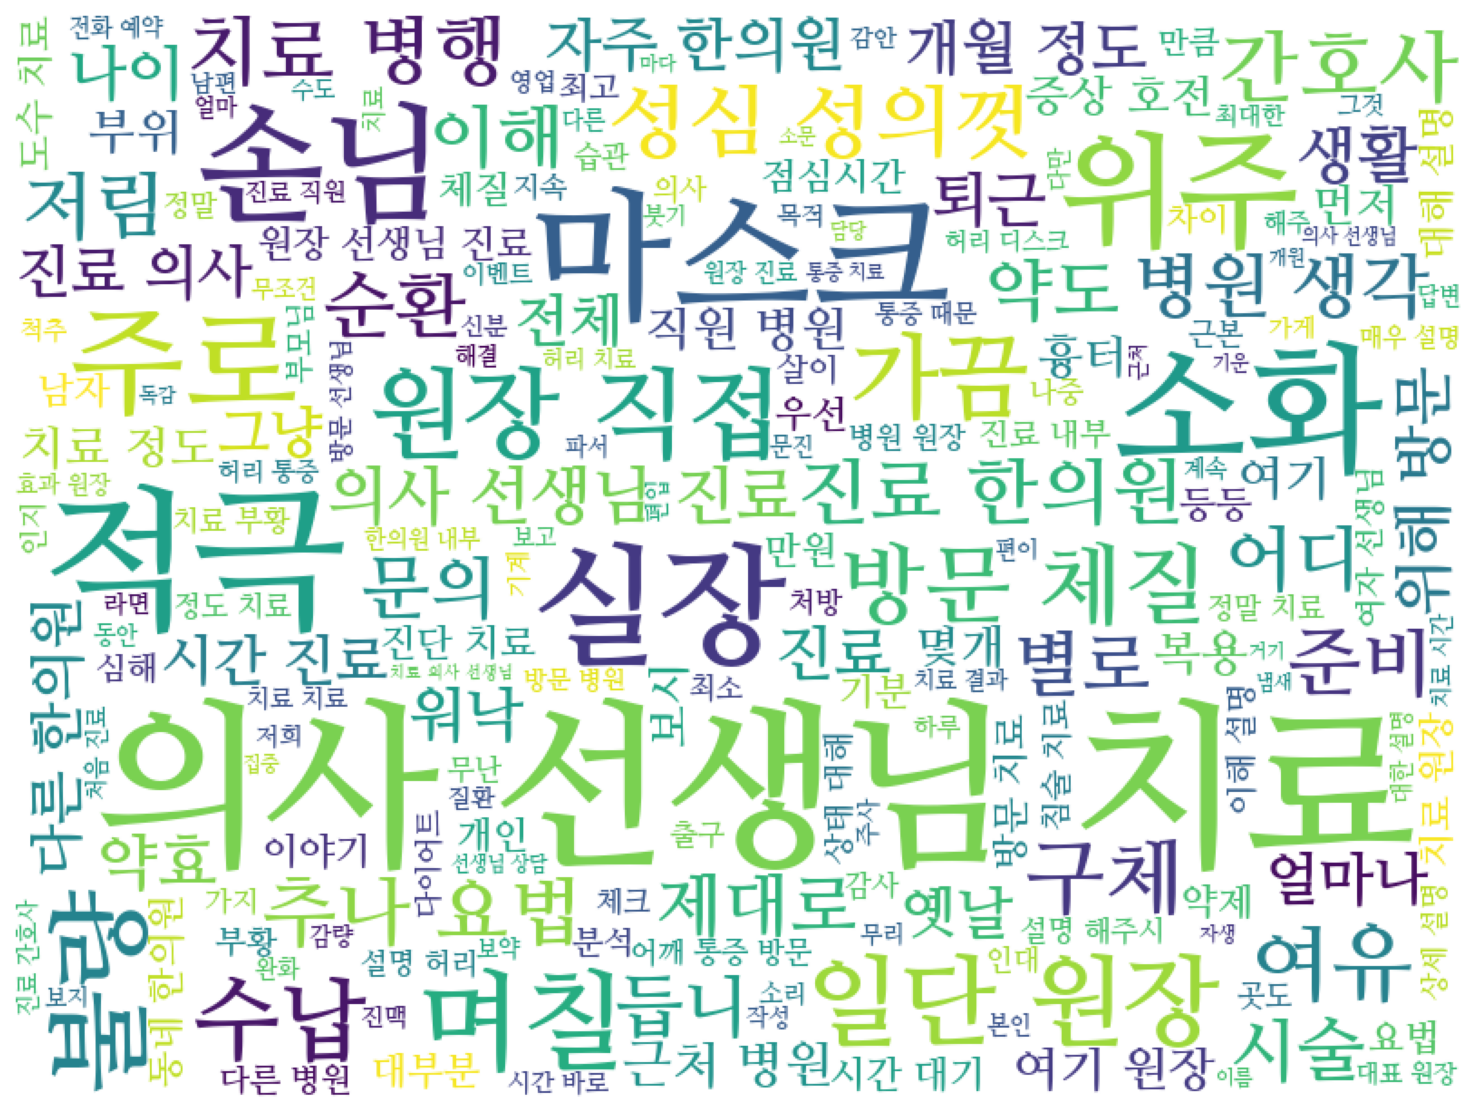

In [ ]:
#불용어
from wordcloud import STOPWORDS
from wordcloud import WordCloud


mystopwords = set(STOPWORDS)
mystopwords.add('치료')
mystopwords.update(['설명의사','한의원'])


#워드클라우드. #폰트 경로설정 가장 중요


wordcloud = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
                      stopwords = mystopwords,
                      background_color='white',
                      width=800,
                      height=600)

# print(dict(words_v2))

cloud = wordcloud.generate_from_frequencies(dict(words_clean))
plt.figure(figsize=(15, 10))
plt.axis('off')
plt.imshow(cloud)
plt.show()

## **NETWORK**

In [25]:
for_network.head()

,hospital,stars,reviews,adress
22,대구자생한방병원,5.5,"[내, 돈, 곳, 교통사고, 치료, 대기, 침, 애, 그냥, 집, 근처, 거, 애,...",대구
36,청담미한의원,1.8,"[직원, 자기, 끼리, 여자, 원장, 뭔가, 전문, 느낌, 한약, 한약, 효과, 주...",대구
99,봉화한의원,1.0,"[스트레스, 더, 여자, 한의사, 업무, 목, 무아, 파서, 스트레스, 성도, 한약...",대구
179,금호한의원,5.5,"[원장, 카운터, 여직원, 아주, 진료, 기분, 병원]",대구
185,예맥한의원,4.0,"[동네, 소개, 처음, 방문, 물리치료, 침, 부항, 다음, 날, 오히려, 더, 파...",대구


In [26]:
network_an = []

for i in for_network.reviews:
    if '한약' in i:
        network_an.append(i)
    if '처음' in i :
        network_an.append(i)
    if '진료' in i :
        network_an.append(i)
    if '물리치료' in i:
        network_an.append(i)
    if '환자' in i:
        network_an.append(i)
    if '기분' in i:
        network_an.append(i)
    if '안마' in i:
        network_an.append(i)
    if '여자' in i:
        network_an.append(i)
    # if '추천' in i:
    #     network_an.append(i)
 
network_an_df = pd.DataFrame({'reviews': network_an})
print(network_an_df.shape)
network_an_df.head()

(25, 1)


,reviews
0,"[직원, 자기, 끼리, 여자, 원장, 뭔가, 전문, 느낌, 한약, 한약, 효과, 주..."
1,"[직원, 자기, 끼리, 여자, 원장, 뭔가, 전문, 느낌, 한약, 한약, 효과, 주..."
2,"[직원, 자기, 끼리, 여자, 원장, 뭔가, 전문, 느낌, 한약, 한약, 효과, 주..."
3,"[스트레스, 더, 여자, 한의사, 업무, 목, 무아, 파서, 스트레스, 성도, 한약..."
4,"[스트레스, 더, 여자, 한의사, 업무, 목, 무아, 파서, 스트레스, 성도, 한약..."


In [32]:
from apyori import apriori
result = (list(apriori(network_an_df.reviews, min_support = 0.3)))
df = pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x: len(x))
df = df[(df['support'] >= 0.3)].sort_values(by='support', ascending = False)
df.head()

,items,support,ordered_statistics,length
11,(한약),0.64,"[((), (한약), 0.64, 1.0)]",1
10,(침),0.64,"[((), (침), 0.64, 1.0)]",1
8,(직원),0.48,"[((), (직원), 0.48, 1.0)]",1
31,"(침, 직원)",0.48,"[((), (침, 직원), 0.48, 1.0), ((직원), (침), 1.0, 1....",2
34,"(침, 한약)",0.48,"[((), (침, 한약), 0.48, 1.0), ((침), (한약), 0.75, 1...",2


In [33]:
network_df = df.copy()
df_network = network_df[network_df['length']==2]
df_network.head()

,items,support,ordered_statistics,length
31,"(침, 직원)",0.48,"[((), (침, 직원), 0.48, 1.0), ((직원), (침), 1.0, 1....",2
34,"(침, 한약)",0.48,"[((), (침, 한약), 0.48, 1.0), ((침), (한약), 0.75, 1...",2
32,"(직원, 한약)",0.44,"[((), (직원, 한약), 0.44, 1.0), ((직원), (한약), 0.916...",2
25,"(침, 목)",0.36,"[((), (침, 목), 0.36, 1.0), ((목), (침), 1.0, 1.56...",2
21,"(침, 느낌)",0.36,"[((), (침, 느낌), 0.36, 1.0), ((느낌), (침), 1.0, 1....",2


In [34]:
index= []

for num, i in enumerate (df_network['items']):
    if '한약' in i:
        index.append(num)
    if '처음' in i:
        index.append(num)
    if '진료' in i:
        index.append(num)
    if '물리치료' in i:
        index.append(num)
    if '환지' in i:
        index.append(num)
    if '기분' in i:
        index.append(num)
    if '안마' in i:
        index.append(num)
    if '여자' in i:
        index.append(num)
    # if '추천' in i:
    #     index.append(num)

In [35]:
net_an = df_network.iloc[index]
net_an.head()

,items,support,ordered_statistics,length
34,"(침, 한약)",0.48,"[((), (침, 한약), 0.48, 1.0), ((침), (한약), 0.75, 1...",2
32,"(직원, 한약)",0.44,"[((), (직원, 한약), 0.44, 1.0), ((직원), (한약), 0.916...",2
22,"(느낌, 한약)",0.36,"[((), (느낌, 한약), 0.36, 1.0), ((느낌), (한약), 1.0, ...",2
26,"(목, 한약)",0.32,"[((), (목, 한약), 0.32, 1.0), ((목), (한약), 0.88888...",2
15,"(여자, 권유)",0.32,"[((), (여자, 권유), 0.32, 1.0), ((권유), (여자), 1.0, ...",2


In [42]:
#그래프로 표현
import networkx as nx
G = nx.Graph()
ar = (df_network['items'])
G.add_edges_from(ar)

In [43]:
#페이지 랭크
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 1000 * (nsize - min(nsize) / (max(nsize)-min(nsize)))

C:\Users\yukir\anaconda3\envs\NLP\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


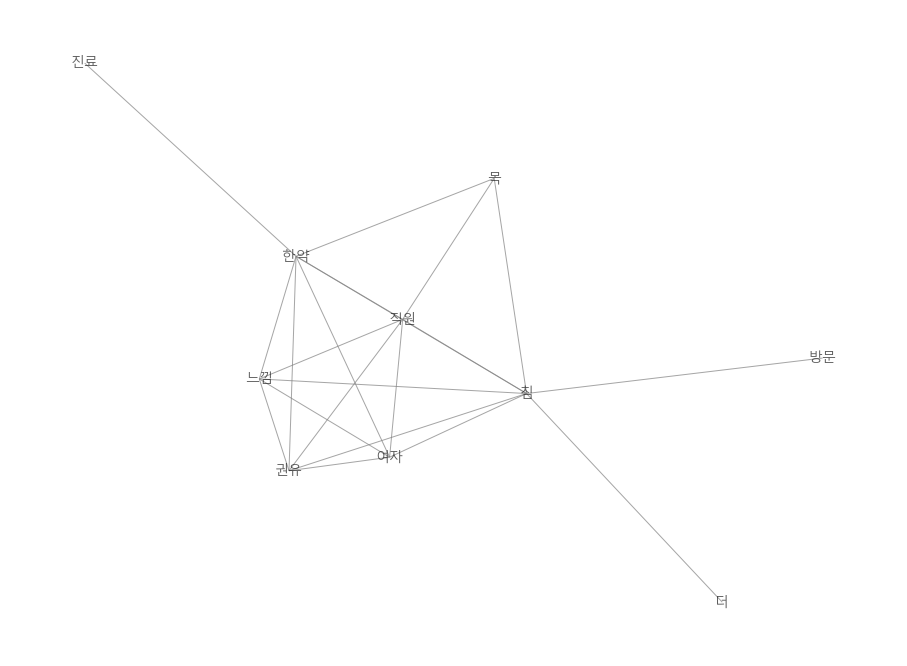

In [44]:
pos = nx.fruchterman_reingold_layout(G)
plt.figure(figsize=(16, 12))
plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 14,
                 pos = pos, node_color = list(pr.values()), node_size = nsize,
                 alpha=0.7, edge_color = '.5', cmap=plt.cm.YlGn)

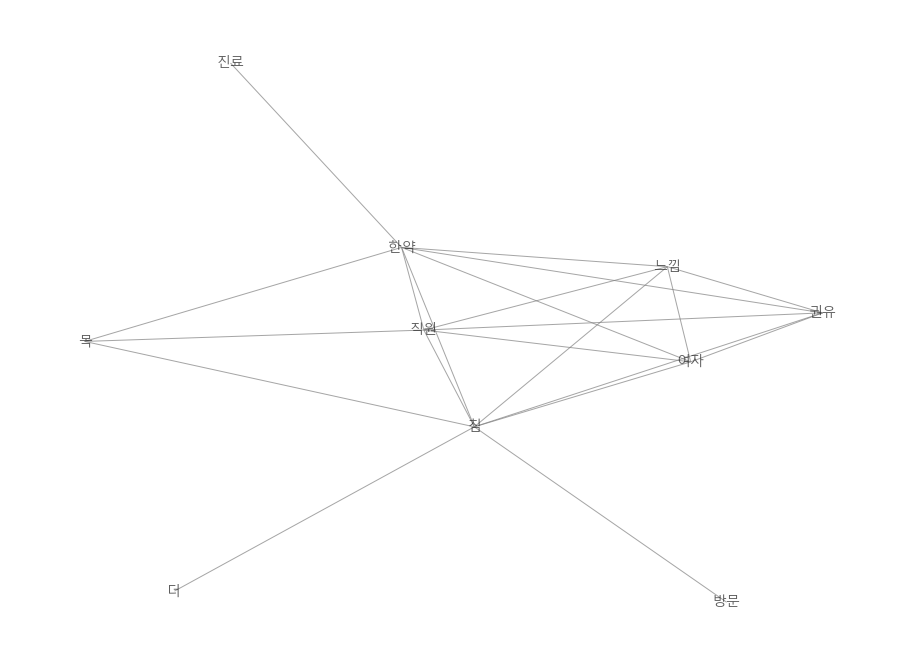

In [45]:
pos = nx.spring_layout(G)
plt.figure(figsize=(16, 12))
plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 14,
                 pos = pos, node_color = list(pr.values()), node_size = nsize,
                 alpha=0.7, edge_color = '.5', cmap=plt.cm.YlGn)

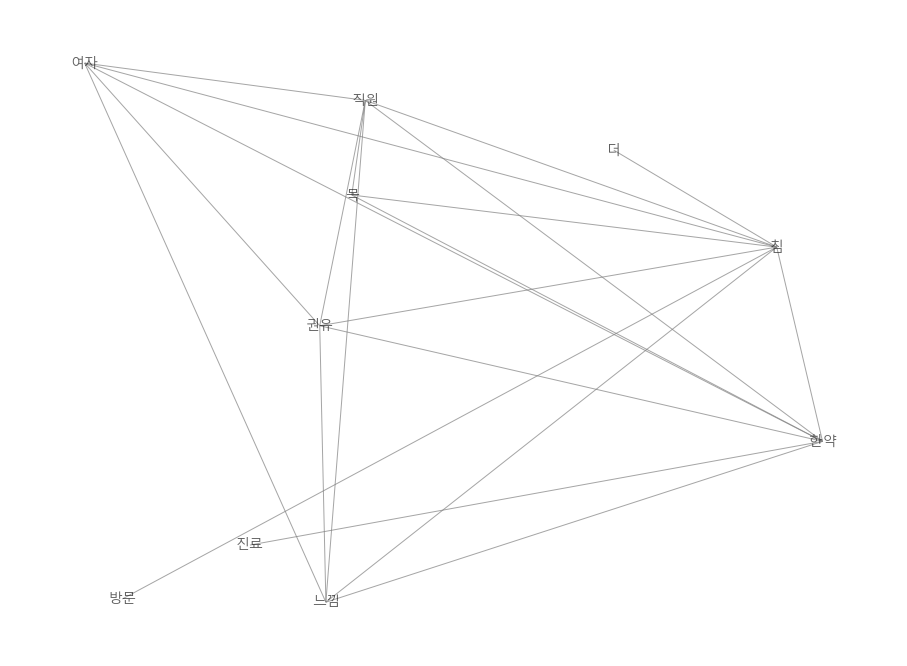

In [46]:
pos = nx.random_layout(G)
plt.figure(figsize=(16, 12))
plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 14,
                 pos = pos, node_color = list(pr.values()), node_size = nsize,
                 alpha=0.7, edge_color = '.5', cmap=plt.cm.YlGn)

In [ ]:
for_network.head()

In [55]:
from apyori import apriori
result = (list(apriori(for_network.reviews, min_support = 0.08)))
df = pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x: len(x))
df = df[(df['support'] >= 0.08)].sort_values(by='support', ascending = False)
df.head()

,items,support,ordered_statistics,length
42,(침),0.533333,"[((), (침), 0.5333333333333333, 1.0)]",1
48,(한의원),0.466667,"[((), (한의원), 0.4666666666666667, 1.0)]",1
6,(그냥),0.400000,"[((), (그냥), 0.4, 1.0)]",1
47,(한약),0.400000,"[((), (한약), 0.4, 1.0)]",1
203,"(침, 치료)",0.333333,"[((), (침, 치료), 0.3333333333333333, 1.0), ((치료)...",2


In [56]:
network_df = df.copy()
df_network = network_df[network_df['length']==2]
df_network.head()

,items,support,ordered_statistics,length
203,"(침, 치료)",0.333333,"[((), (침, 치료), 0.3333333333333333, 1.0), ((치료)...",2
194,"(침, 직원)",0.333333,"[((), (침, 직원), 0.3333333333333333, 1.0), ((직원)...",2
215,"(침, 한의원)",0.266667,"[((), (침, 한의원), 0.26666666666666666, 1.0), ((침...",2
214,"(침, 한약)",0.266667,"[((), (침, 한약), 0.26666666666666666, 1.0), ((침)...",2
95,"(침, 그냥)",0.266667,"[((), (침, 그냥), 0.26666666666666666, 1.0), ((그냥...",2


In [57]:
#그래프로 표현
import networkx as nx
G = nx.Graph()
ar = (df_network['items'])
G.add_edges_from(ar)

In [58]:
#페이지 랭크
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 1000 * (nsize - min(nsize) / (max(nsize)-min(nsize)))

C:\Users\yukir\anaconda3\envs\NLP\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


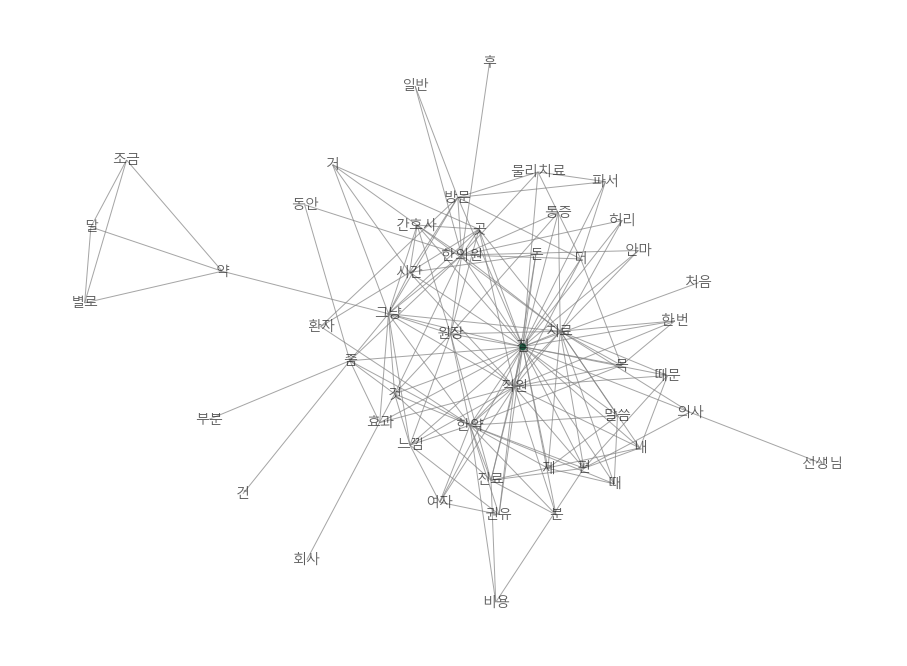

In [59]:
pos = nx.kamada_kawai_layout(G)
plt.figure(figsize=(16, 12))
plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 14,
                 pos = pos, node_color = list(pr.values()), node_size = nsize,
                 alpha=0.7, edge_color = '.5', cmap=plt.cm.YlGn)

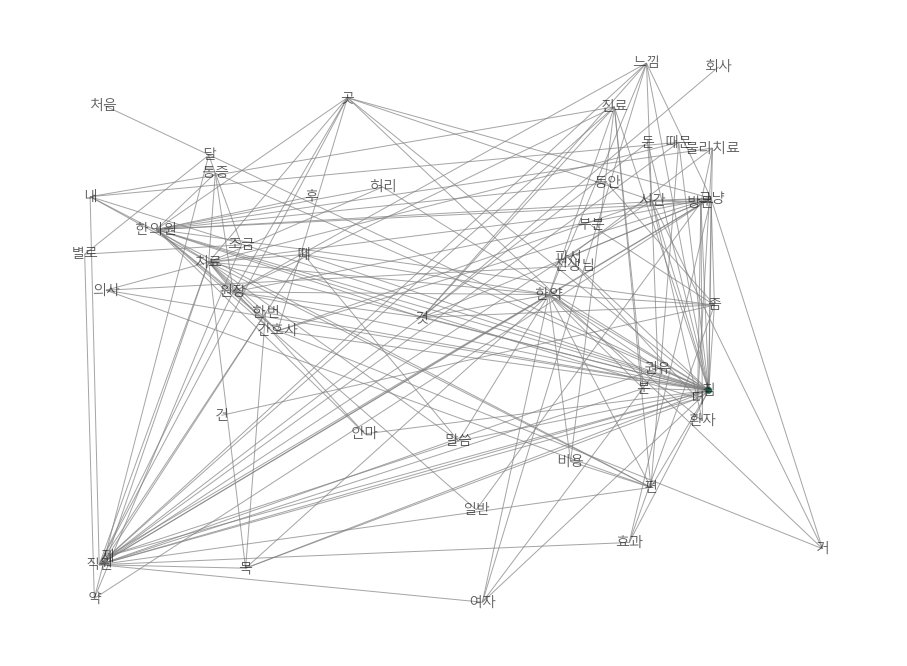

In [60]:
pos = nx.random_layout(G)
plt.figure(figsize=(16, 12))
plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 14,
                 pos = pos, node_color = list(pr.values()), node_size = nsize,
                 alpha=0.7, edge_color = '.5', cmap=plt.cm.YlGn)

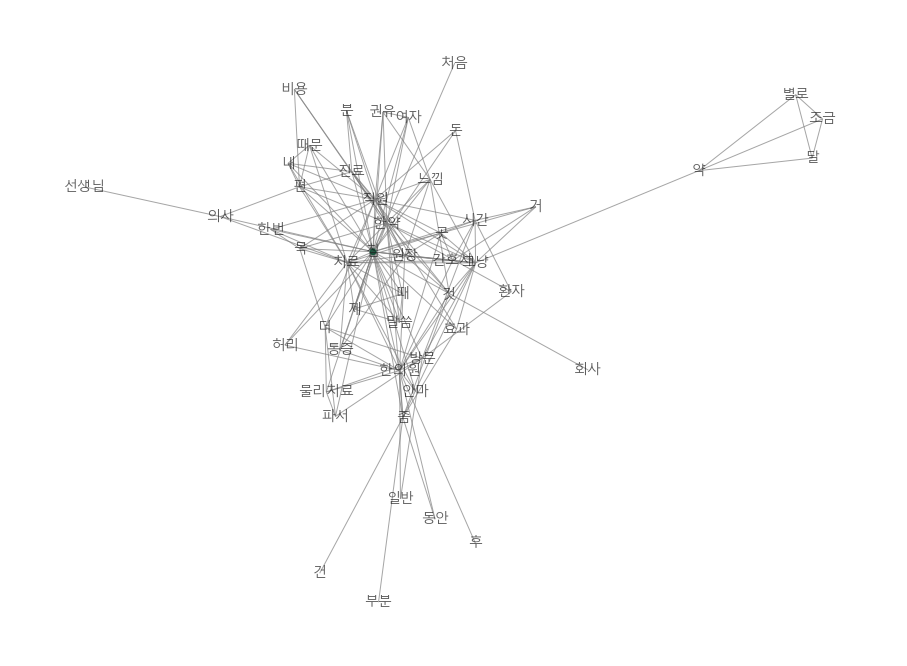

In [61]:
pos = nx.spring_layout(G)
plt.figure(figsize=(16, 12))
plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 14,
                 pos = pos, node_color = list(pr.values()), node_size = nsize,
                 alpha=0.7, edge_color = '.5', cmap=plt.cm.YlGn)

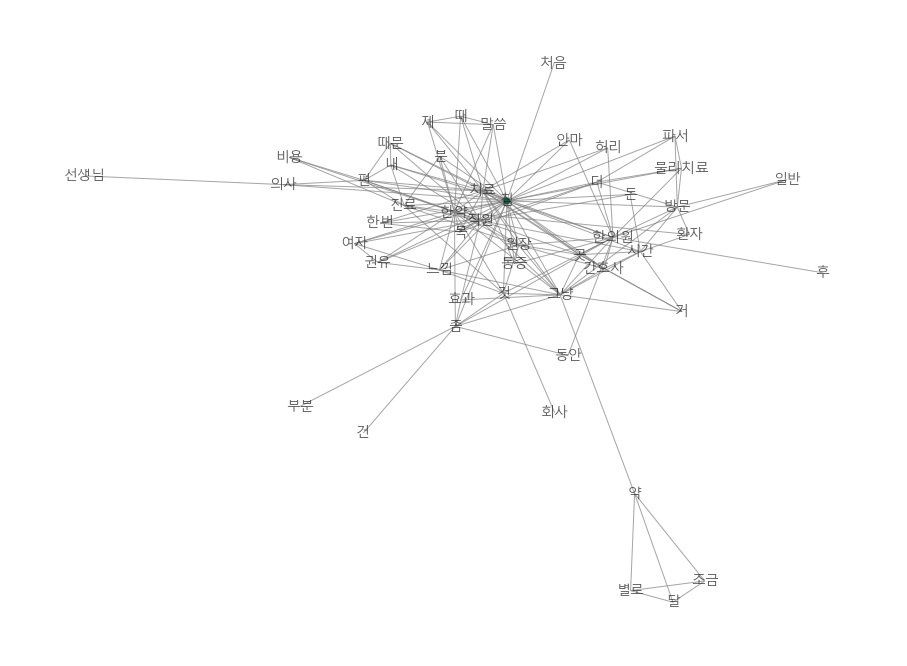

In [62]:
pos = nx.fruchterman_reingold_layout(G)
plt.figure(figsize=(16, 12))
plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 14,
                 pos = pos, node_color = list(pr.values()), node_size = nsize,
                 alpha=0.7, edge_color = '.5', cmap=plt.cm.YlGn)